In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ссылка на датасет: https://www.kaggle.com/datasets/sanskrutipanda/car-pricing-prediction

#### 1.Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

In [ ]:
#Читаем датасет
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.1_preprocessing/data/cars_sampled.csv')

In [ ]:
#Смотрим его содержимое
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


#### 2.Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [ ]:
#Размер таблицы 19 столбцов , 50001 строка
df.shape

(50001, 19)

In [ ]:
#Слева статитические данные  count - кол-во строк
#mean - среднее значение 
#std - стандартное отклонение
#min, max - минимум и максимум
#Все эти значения относительно столбцов таблицы (написаны сверху)
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [ ]:
#Проверка на пустые значения , если 0, то пропусков нет, если цифра- это кол-во пропусков
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

#### 4.Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

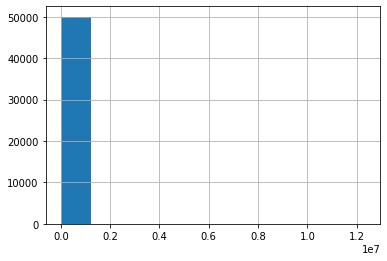

In [ ]:
#Строим гистограму по цене, как видим не нормальное распределение, нормальное распределение на графике сверху
df.price.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f46003be280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f46003be940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f46003aaee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f46003c9040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f46003c9340>],
 'means': []}

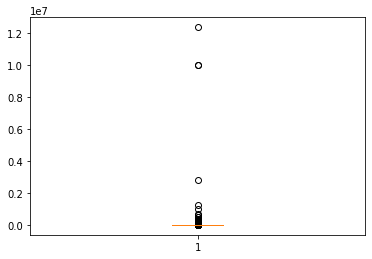

In [ ]:
#Это график с усами - он показан сверху, вот эти точки - это выбросы, от них нужно избавиться
plt.boxplot(df.price)

In [ ]:
#Посмотрели, видим, что середина 6559, а макс 12345678 из-за этого у нас выброс и сильный размах
print(min(df.price),np.mean(df.price),max(df.price))

0 6559.865462690746 12345678


In [ ]:
#Удалим выбросы по формуле 
#верхний (квартиль 75)+(1.5 * (квартиль 75-квартиль 25)) 
#нижний (квартиль 25)-(1.5 * (квартиль 75-квартиль 25)) 
#Убираем все значения, которые попадают в эти промежутки 
q75 = np.percentile(df.price,75)
q25 = np.percentile(df.price,25)

intr_qr = q75-q25
max_v = q75+(1.5*intr_qr)
min_v = q25-(1.5*intr_qr)

df = df[(df['price']>min_v)&(df['price']<max_v)]

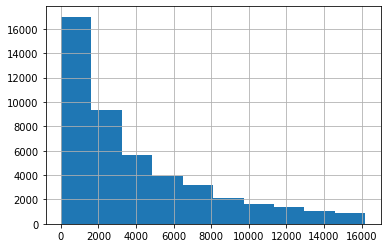

In [ ]:
#Распределение стало лучше
df.price.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f46002c23a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f46002c2a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f46002c2040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f46002cc160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f46002cc460>],
 'means': []}

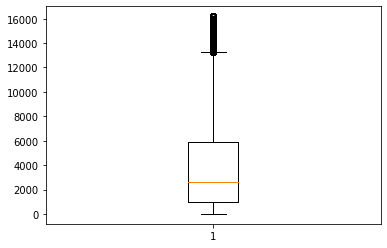

In [ ]:
#Ящик стал визуально видимым, но появились опять выбросы, но это новые из-за того, что удалили старые, поэтому нормально
plt.boxplot(df.price)

#### 5.Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

In [ ]:
#Появилась таблица корреляции сверхи и справа названия наших столбцов , а сама таблица - это связь
# 1 - наибольшая связь, 0 - связи нет никакой, рассматриваем значения по модулю, поэтому макс тут 0.283477 между 
# price и kilometer
df_corr =df.corr()
df_corr

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.023879,0.125860,-0.283477,0.116240,0.067885
yearOfRegistration,0.023879,1.000000,-0.005180,-0.062717,-0.020570,-0.006419
powerPS,0.125860,-0.005180,1.000000,0.018285,0.031445,0.011144
kilometer,-0.283477,-0.062717,0.018285,1.000000,0.015690,0.003247
monthOfRegistration,0.116240,-0.020570,0.031445,0.015690,1.000000,0.018444
postalCode,0.067885,-0.006419,0.011144,0.003247,0.018444,1.000000


In [ ]:
#Отсортируем получившиеся значение по цене
df_corr['price'].sort_values()

kilometer             -0.283477
yearOfRegistration     0.023879
postalCode             0.067885
monthOfRegistration    0.116240
powerPS                0.125860
price                  1.000000
Name: price, dtype: float64

In [ ]:
import seaborn as sns

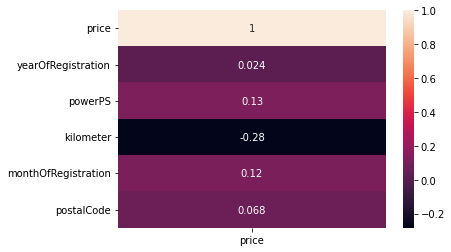

In [ ]:
#Созадли тепловой график (справа шкала по свзязи, тут тоже 1 - макс, 0 - мин ) , но тут -0.28 черным, но раз у нас модуль
#То в тепловой это не учитывается
sns.heatmap(df_corr[['price']], annot=True)

#### 6.Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

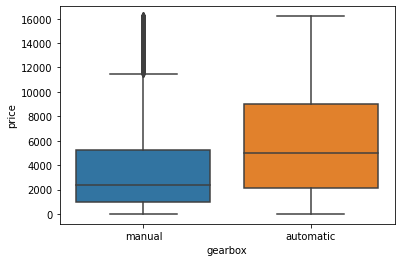

In [ ]:
#Видим, что цена от automatic выше, чем от manual и у manual больше разброк (жирная палка сверху)
sns.boxplot(x=df["gearbox"], y=df["price"])

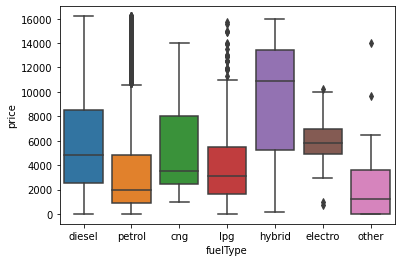

In [ ]:
#Видим, что менее всего зависит others, более всего hybrid, больше всего разбросы у petrol и lpg fuelType
sns.boxplot(x=df["fuelType"], y=df["price"])

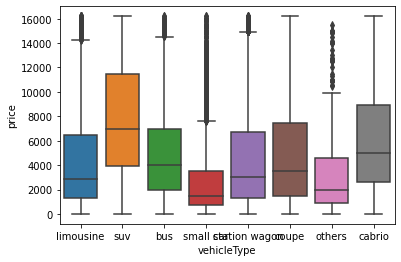

In [ ]:
#Сильнее всего зависимость у small, сильнее всего suv, разбросы больше всего у small, others
sns.boxplot(x=df["vehicleType"], y=df["price"])

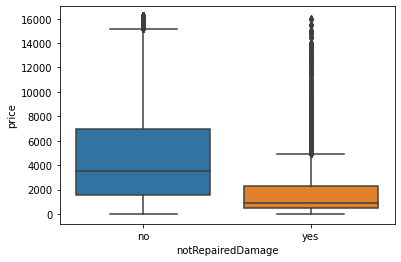

In [ ]:
#Цены выше у no, у yes большой разброс
sns.boxplot(x=df["notRepairedDamage"], y=df["price"])

#### 7.Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [ ]:
#смотрим пропуски
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5113
yearOfRegistration        0
gearbox                2748
powerPS                   0
model                  2598
kilometer                 0
monthOfRegistration       0
fuelType               4394
brand                     0
notRepairedDamage      9507
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
#Удаляем столбцы с наибольшим кол-во пропусков ['notRepairedDamage','vehicleType']
drop_col = ['notRepairedDamage','vehicleType']
df = df.drop(drop_col, axis=1)

In [ ]:
#Смотрим по столбцам, они удалились
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
yearOfRegistration        0
gearbox                2748
powerPS                   0
model                  2598
kilometer                 0
monthOfRegistration       0
fuelType               4394
brand                     0
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
#Заполняем модой остальные пропуски. Модой тк у нас пропуски в объектах и это более логичная замена
#мода - самое часто встречающееся значение
for column in ['gearbox','model','fuelType']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
#Видим,что нет пропусков
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

#### 8.Сохраните полученный датасет и выведете его.

In [ ]:
#Готовый датасет
df

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,2003,manual,150,3er,150000,3,diesel,bmw,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,2005,manual,163,xc_reihe,150000,6,diesel,volvo,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,2003,manual,101,touran,150000,11,diesel,volkswagen,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,2006,manual,86,ibiza,60000,12,petrol,seat,19/03/2016 0:00,34537,7/4/2016 4:44
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,1995,manual,90,passat,150000,2,petrol,volkswagen,2/4/2016 0:00,26826,2/4/2016 12:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23/03/2016 21:45,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,2290,test,2001,manual,101,astra,150000,3,petrol,opel,23/03/2016 0:00,27305,4/4/2016 1:47
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,2005,manual,0,transporter,150000,0,petrol,volkswagen,3/4/2016 0:00,29690,5/4/2016 15:16
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,2004,manual,0,3er,150000,1,petrol,bmw,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,2000,manual,0,megane,150000,8,petrol,renault,15/03/2016 0:00,65232,6/4/2016 17:15


Удалим столбцы с датой

In [ ]:
df = df.drop(['dateCrawled','dateCreated','lastSeen'], axis=1)

In [ ]:
df.head()

,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode
0,Zu_verkaufen,private,offer,4450,test,2003,manual,150,3er,150000,3,diesel,bmw,20257
1,Volvo_XC90_2.4D_Summum,private,offer,13299,control,2005,manual,163,xc_reihe,150000,6,diesel,volvo,88045
2,Volkswagen_Touran,private,offer,3200,test,2003,manual,101,touran,150000,11,diesel,volkswagen,27449
3,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,2006,manual,86,ibiza,60000,12,petrol,seat,34537
5,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,1995,manual,90,passat,150000,2,petrol,volkswagen,26826


## Дополнительно

#### 1.Постройте модель регрессии для цены автомобиля. Обучите ее на данных, полученных из исходного датасета с применением разных методов заполнения пропущенных значений. Сделайте вывод об эффективности разных методов.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46240 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 46240 non-null  object
 1   seller               46240 non-null  object
 2   offerType            46240 non-null  object
 3   price                46240 non-null  int64 
 4   abtest               46240 non-null  object
 5   yearOfRegistration   46240 non-null  int64 
 6   gearbox              46240 non-null  object
 7   powerPS              46240 non-null  int64 
 8   model                46240 non-null  object
 9   kilometer            46240 non-null  int64 
 10  monthOfRegistration  46240 non-null  int64 
 11  fuelType             46240 non-null  object
 12  brand                46240 non-null  object
 13  postalCode           46240 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.3+ MB


Удалим столбцы с объектами, тк для обучения принимаются только  числовые значения

In [ ]:
df = df.drop(['offerType','name','seller','abtest','gearbox','model','fuelType','brand'], axis=1)

In [ ]:
df.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
0,4450,2003,150,150000,3,20257
1,13299,2005,163,150000,6,88045
2,3200,2003,101,150000,11,27449
3,4500,2006,86,60000,12,34537
5,988,1995,90,150000,2,26826


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['yearOfRegistration','powerPS','kilometer','monthOfRegistration','postalCode']], df['price'], train_size = 0.8, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

Обучение модели

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Модель плохо обучена. Возможно проблема из-за плохой связи между данными в датасете
model.score(X_test,y_test)

0.10956822248335873